<a href="https://colab.research.google.com/github/Jems-Chawin/Machine-Learning-Lab/blob/main/Lab5/Lab5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB 5 - PART 2 CNN**

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

torch.manual_seed(841)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### **Data Preparation**
- **Create two images**: one for a square and another for a triangle.<br>
    Each image should be 4x4 pixels with values as shown below.<br>
    Then stack them in to tensor like `torch.tensor([<square tensor>,<triangle tensor>])`.

- **Create the label**: create the labels that correspond to each image. Use 1 for square and 0 for triangle.<br>

In [ ]:
### START CODE HERE ###
square = np.array([[1,1,1,1],
                   [1,5,5,1],
                   [1,5,5,1],
                   [1,1,1,1]])
triangle = np.array([[1,1,1,5],
                     [1,1,5,5],
                     [1,5,5,5],
                     [5,5,5,5]])

tensor_square = torch.tensor(square)
tensor_triangle = torch.tensor(triangle)

tensor_square = tensor_square.unsqueeze(0)
tensor_triangle = tensor_triangle.unsqueeze(0)

labels_square = torch.tensor([1])
labels_triangle = torch.tensor([0])

data_tensors = torch.stack([tensor_square, tensor_triangle])
data_labels = torch.stack([labels_square, labels_triangle])

### END CODE HERE ###

If your code is correct, this cell will execute without any issues.

In [ ]:
assert data_tensors.shape == torch.Size([2, 1, 4, 4])
assert data_labels.shape == torch.Size([2, 1])
print("You have successfully created the data_tensors!")

You have successfully created the data_tensors!


A `DataLoader` is a PyTorch utility that helps in loading and batching data for training or inference. <br>
It takes in a dataset as input and provides an iterable over the dataset, allowing you to access the data in batches.

In [ ]:
dataset = torch.utils.data.TensorDataset(data_tensors, data_labels)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=len(dataset), shuffle=True)

### **Define the SimpleCNN Architecture**

**Create simpleCNN model class using PyTorch.**
- Using `Conv2d()`,`ReLU()`,`Flatten()`,`Linear()`,`Sigmoid()`


In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        ### START CODE HERE ###
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=2, out_channels=2, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(32,2)
        self.relu3 = nn.ReLU()
        self.out = nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid()
        ### END CODE HERE ###

    def get_features(self, x):
        """
        Function to get the feature maps of the input
        """
        x = self.conv1(x)
        f1 = self.relu1(x)
        x = self.conv2(f1)
        f2 = self.relu2(x)
        return f1,f2

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.flatten(x)
        x = self.fc(x)
        x = self.relu3(x)
        x = self.out(x)
        x = self.sigmoid(x)
        return x

# Set the random seed for reproducible results
torch.manual_seed(841)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
print(model)

SimpleCNN(
  (conv1): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(2, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=32, out_features=2, bias=True)
  (relu3): ReLU()
  (out): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


If your model architechture is correct. this cell will execute without any issues.

In [ ]:
assert model(tensor_triangle.unsqueeze(1).float().to(device)).shape == torch.Size([1, 1])
print("You have successfully implemented a forward pass!")

You have successfully implemented a forward pass!


### **Train the model for `n` Epochs.**<br>

After the training process you'll have to plot the model's loss for each epoch.

In [ ]:
### START CODE HERE ###
epochs = 10000
lr = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss_history = []
for epoch in range(epochs):
    for x,y in dataloader:
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        output = model(x.float())
        loss = criterion(output, y.float())
        loss.backward()
        optimizer.step()

    loss_history.append(loss.item())

    if (epoch+1) % 100 == 0:
        print(f'[Epoch {epoch+1}] Loss: {loss.item()}')
### END CODE HERE ###

[Epoch 100] Loss: 0.6887524724006653
[Epoch 200] Loss: 0.6849654912948608
[Epoch 300] Loss: 0.6804764270782471
[Epoch 400] Loss: 0.6738135814666748
[Epoch 500] Loss: 0.6658682823181152
[Epoch 600] Loss: 0.6571264266967773
[Epoch 700] Loss: 0.6465257406234741
[Epoch 800] Loss: 0.6337717175483704
[Epoch 900] Loss: 0.617363452911377
[Epoch 1000] Loss: 0.5968653559684753
[Epoch 1100] Loss: 0.571781575679779
[Epoch 1200] Loss: 0.5429844856262207
[Epoch 1300] Loss: 0.5107478499412537
[Epoch 1400] Loss: 0.47731101512908936
[Epoch 1500] Loss: 0.4455109238624573
[Epoch 1600] Loss: 0.4172670245170593
[Epoch 1700] Loss: 0.3931182026863098
[Epoch 1800] Loss: 0.37361249327659607
[Epoch 1900] Loss: 0.3567778468132019
[Epoch 2000] Loss: 0.3428036570549011
[Epoch 2100] Loss: 0.33070802688598633
[Epoch 2200] Loss: 0.3189103603363037
[Epoch 2300] Loss: 0.3078440725803375
[Epoch 2400] Loss: 0.29606178402900696
[Epoch 2500] Loss: 0.2825261354446411
[Epoch 2600] Loss: 0.2666209042072296
[Epoch 2700] Loss: 

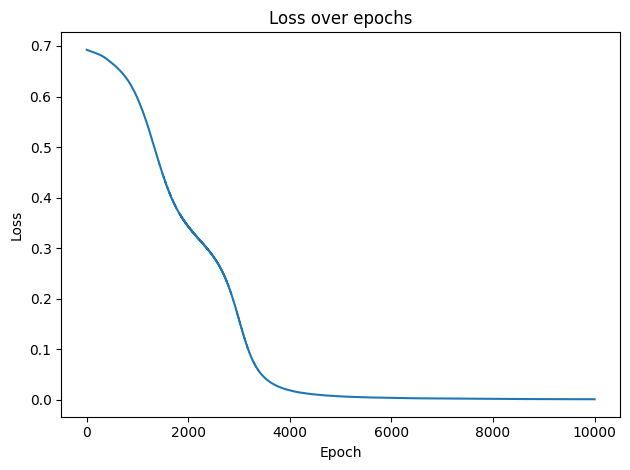

In [ ]:
plt.plot(loss_history)
plt.title("Loss over epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.tight_layout()
plt.show()

**Print model's weight**

- Using `.state_dict()`

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

```
OrderedDict([('conv1.weight',
              tensor([...], device='cuda:0')),
             ('conv1.bias', tensor([...], device='cuda:0')),
             ('conv2.weight',
              ...
             ('out.weight', tensor([...], device='cuda:0')),
             ('out.bias', tensor([...], device='cuda:0'))])
```

</details>

In [ ]:
### START CODE HERE ###
model.state_dict()
### END CODE HERE ###

OrderedDict([('conv1.weight',
              tensor([[[[ 0.4067,  0.3885,  0.0350],
                        [ 0.1886, -0.2966, -0.3441],
                        [ 0.0218, -0.1420, -0.0328]]],
              
              
                      [[[-0.1634,  0.0051,  0.2133],
                        [ 0.3012,  0.4258,  0.2038],
                        [-0.1495,  0.4598,  0.5247]]]])),
             ('conv1.bias', tensor([-0.1167,  0.1044])),
             ('conv2.weight',
              tensor([[[[ 0.1382,  0.0599, -0.3067],
                        [-0.1226, -0.0461, -0.3297],
                        [-0.1627, -0.1836, -0.0983]],
              
                       [[-0.0271,  0.2784,  0.2995],
                        [ 0.2462,  0.4819,  0.3733],
                        [-0.0148,  0.1654,  0.2258]]],
              
              
                      [[[-0.0155, -0.0861, -0.0033],
                        [-0.0911,  0.0210,  0.1185],
                        [-0.2459,  0.2029,  0.2227]],
  

**Show feature maps of each model's filters with 2 classes of inputs.**

- Use `.get_features()`

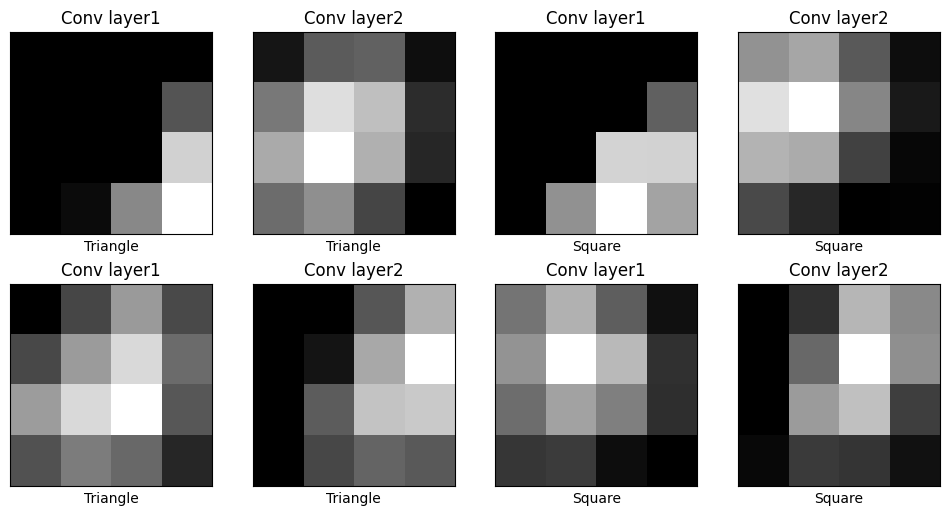

In [ ]:
### START CODE HERE ###

conv1_triangle, conv2_triangle = model.get_features(tensor_triangle.unsqueeze(1).float().to(device))
conv1_square, conv2_square = model.get_features(tensor_square.unsqueeze(1).float().to(device))

plt.figure(figsize=(12, 6))

feature_maps = [conv1_triangle, conv2_triangle, conv1_square, conv2_square]
titles = ['Conv layer1', 'Conv layer2']

triangle_lst = [1,2,5,6]
square_lst = [3,4,7,8]

for i, feature_map in enumerate(feature_maps):
    plt.subplot(2, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    if i+1 in triangle_lst:
      plt.xlabel("Triangle")
    else:
      plt.xlabel("Square")
    plt.title(titles[i % 2])
    plt.imshow(feature_map[0, 0, :].squeeze().cpu().detach().numpy(), cmap='gray')
    plt.subplot(2, 4, i + 5)
    plt.xticks([])
    plt.yticks([])
    if i+5 in square_lst:
      plt.xlabel("Square")
    else:
      plt.xlabel("Triangle")
    plt.title(titles[i % 2])
    plt.imshow(feature_map[0, 1, :].squeeze().cpu().detach().numpy(), cmap='gray')

### END CODE HERE ###

### **Evaluate how the model generalize.**

- **Create two images**: one for a square and another for a triangle.<br>
    Each image should be 4x4 pixels with values as shown below.<br>
    Then stack them in to tensor like `torch.tensor([<square tensor>,<triangle tensor>])`.

- **Create the label**: create the labels that correspond to each image. Use 1 for square and 0 for triangle.<br>

In [ ]:
### START CODE HERE ###
square_test = np.array([[1,1,1,1],
                   [1,2,2,1],
                   [1,2,2,1],
                   [1,1,1,1]])
triangle_test = np.array([[1,1,1,2],
                     [1,1,2,2],
                     [1,2,2,2],
                     [2,2,2,2]])

tensor_square_test = torch.tensor(square_test)
tensor_triangle_test = torch.tensor(triangle_test)

tensor_square_test = tensor_square_test.unsqueeze(0)
tensor_triangle_test = tensor_triangle_test.unsqueeze(0)

labels_square_test = torch.tensor([1])
labels_triangle_test = torch.tensor([0])

test_data_tensors = torch.stack([tensor_square_test, tensor_triangle_test])
test_data_labels = torch.stack([labels_square_test, labels_triangle_test])

### END CODE HERE ###

If your code is correct, this cell will execute without any issues.

In [ ]:
assert data_tensors.shape == torch.Size([2, 1, 4, 4])
assert data_labels.shape == torch.Size([2, 1])
print("You have successfully created the data_tensors!")

You have successfully created the data_tensors!


**Show feature maps of each model's filters with 2 classes of test data.**

- Use `.get_features()`


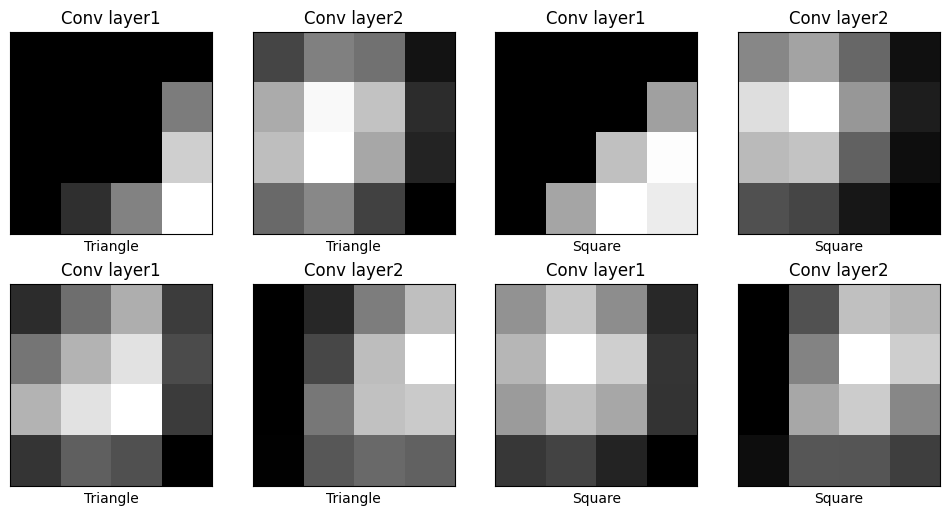

In [ ]:
### START CODE HERE ###

conv1_triangle, conv2_triangle = model.get_features(tensor_triangle_test.unsqueeze(1).float().to(device))
conv1_square, conv2_square = model.get_features(tensor_square_test.unsqueeze(1).float().to(device))

plt.figure(figsize=(12, 6))

feature_maps = [conv1_triangle, conv2_triangle, conv1_square, conv2_square]
titles = ['Conv layer1', 'Conv layer2']

triangle_lst = [1,2,5,6]
square_lst = [3,4,7,8]

for i, feature_map in enumerate(feature_maps):
    plt.subplot(2, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    if i+1 in triangle_lst:
      plt.xlabel("Triangle")
    else:
      plt.xlabel("Square")
    plt.title(titles[i % 2])
    plt.imshow(feature_map[0, 0, :].squeeze().cpu().detach().numpy(), cmap='gray')
    plt.subplot(2, 4, i + 5)
    plt.xticks([])
    plt.yticks([])
    if i+5 in square_lst:
      plt.xlabel("Square")
    else:
      plt.xlabel("Triangle")
    plt.title(titles[i % 2])
    plt.imshow(feature_map[0, 1, :].squeeze().cpu().detach().numpy(), cmap='gray')

### END CODE HERE ###

**Try to predict classes using the test dataset. Then, plot the confusion matrix and print the classification report.**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>


```
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

```

</details>

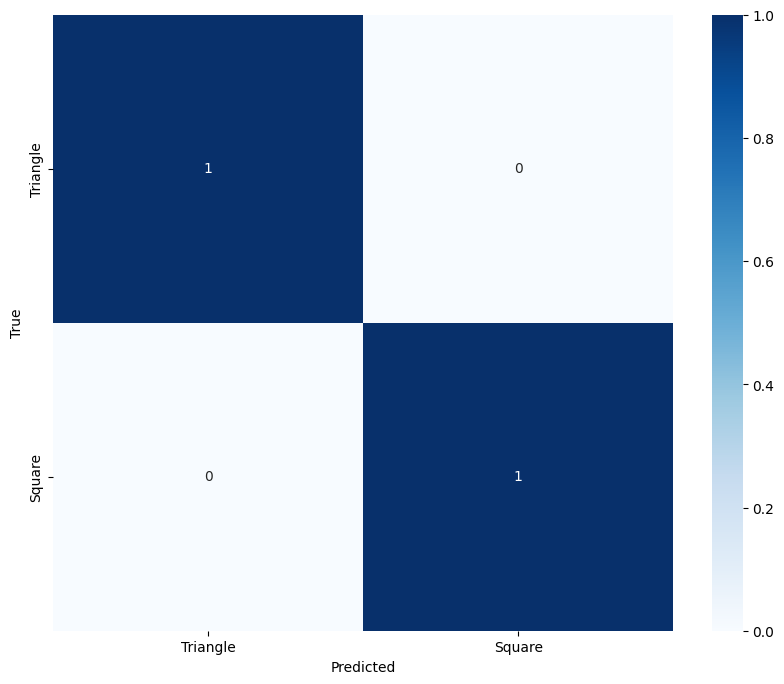

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
### START CODE HERE ###
test_dataset = torch.utils.data.TensorDataset(test_data_tensors, test_data_labels)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

predictions = []
true_labels = []

with torch.no_grad():
    for x, y in test_dataloader:
        x = x.to(device)
        y = y.to(device)
        output = model(x.float())
        predicted = torch.round(output)
        predictions.extend(predicted.cpu().numpy().flatten())
        true_labels.extend(y.cpu().numpy().flatten())

cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 8))
labels = ["Triangle", "Square"]
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(true_labels, predictions))
### END CODE HERE ###